In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('water_potability.csv',encoding='unicode_escape')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.8904555,20791.31898,7.300211873,368.516441,564.3086542,10.37978308,86.99097046,2.963135381,0
1,3.716080075,129.4229205,18630.05786,6.635245884,NaN,592.8853591,15.18001312,56.32907628,4.500656275,0
2,8.099124189,224.2362594,19909.54173,9.275883603,NaN,418.6062131,16.86863693,66.42009251,3.05593375,0
3,8.316765884,214.3733941,22018.41744,8.059332377,356.886136,363.2665162,18.4365245,100.3416744,4.628770537,0
4,9.092223456,181.1015092,17978.98634,6.546599974,310.135738,398.4108134,11.55827944,31.99799273,4.075075425,0


Exploratory Data Analysis

In [3]:

df.shape

(3276, 10)

In [4]:
# Checking Nulls
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   object 
 1   Hardness         3276 non-null   object 
 2   Solids           3276 non-null   object 
 3   Chloramines      3276 non-null   object 
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   object 
 6   Organic_carbon   3276 non-null   object 
 7   Trihalomethanes  3114 non-null   object 
 8   Turbidity        3276 non-null   object 
 9   Potability       3276 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 256.1+ KB


In [6]:
df.describe()

,Sulfate,Potability
count,2495.000000,3276.000000
mean,333.775777,0.103175
std,41.416840,0.304233
min,129.000000,0.000000
25%,307.699498,0.000000
50%,333.073546,0.000000
75%,359.950170,0.000000
max,481.030642,1.000000


In [7]:
df.fillna(df['Sulfate'].mean(), inplace=True)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,333.775777,204.8904555,20791.31898,7.300211873,368.516441,564.3086542,10.37978308,86.99097046,2.963135381,0
1,3.716080075,129.4229205,18630.05786,6.635245884,333.775777,592.8853591,15.18001312,56.32907628,4.500656275,0
2,8.099124189,224.2362594,19909.54173,9.275883603,333.775777,418.6062131,16.86863693,66.42009251,3.05593375,0
3,8.316765884,214.3733941,22018.41744,8.059332377,356.886136,363.2665162,18.4365245,100.3416744,4.628770537,0
4,9.092223456,181.1015092,17978.98634,6.546599974,310.135738,398.4108134,11.55827944,31.99799273,4.075075425,0


In [34]:

df.replace(r'\.(?=\d*\.)', '', regex=True, inplace=True)
df.replace(r'[^0-9.]', '', regex=True, inplace=True)
df.replace(r'\.(?=\d*\.)', '', regex=True, inplace=True)
df.replace(r'\.{2,}', '.', regex=True, inplace=True)
df[["ph", "Trihalomethanes","Hardness","Solids","Chloramines","Conductivity","Organic_carbon","Turbidity"]] = df[["ph", "Trihalomethanes","Hardness","Solids","Chloramines","Conductivity","Organic_carbon","Turbidity"]].apply(pd.to_numeric)

df.fillna(df['ph'].mean(), inplace=True)
df.fillna(df['Trihalomethanes'].mean(), inplace=True)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,333.775777,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [35]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,56.045152,196.369496,22014.092520,10.186989,333.775777,426.205111,49.826372,79.618355,3.966786,0.103175
std,116.641394,32.879761,8768.570827,175.418885,36.142612,80.824064,1656.068227,60.084944,0.780382,0.304233
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,317.094638,365.734414,12.066127,56.647656,3.439711,0.000000
50%,7.385315,196.967627,20927.833605,7.131070,333.775777,421.884968,14.220645,67.623691,3.955028,0.000000
75%,8.924514,216.667456,27332.762125,8.115458,350.385756,481.792305,16.560201,79.178816,4.500320,0.000000
max,333.775777,323.124000,61227.196010,10047.050500,481.030642,753.342620,91456.654130,333.775777,6.739000,1.000000


In [26]:
df.Potability.value_counts()

0    2938
1     338
Name: Potability, dtype: int64

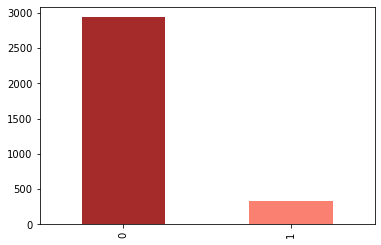

In [36]:
df.Potability.value_counts().plot(kind="bar", color=["brown", "salmon"])
plt.show()

<AxesSubplot:xlabel='ph', ylabel='Density'>

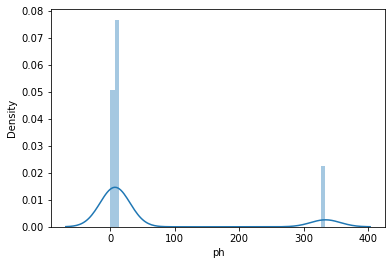

In [37]:
sns.distplot(df['ph'])

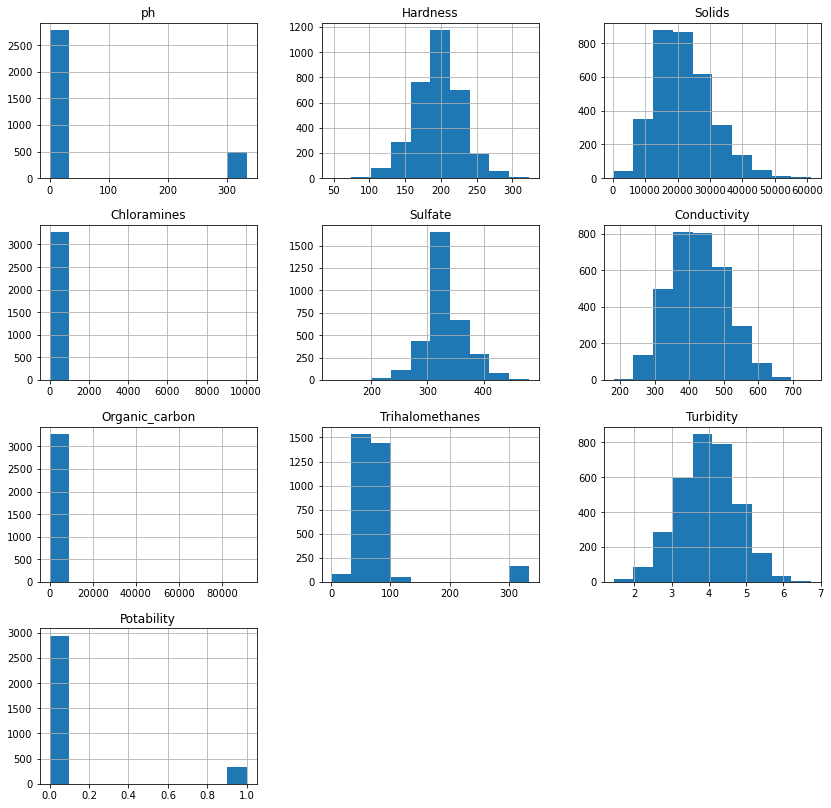

In [38]:
df.hist(figsize=(14,14))
plt.show()

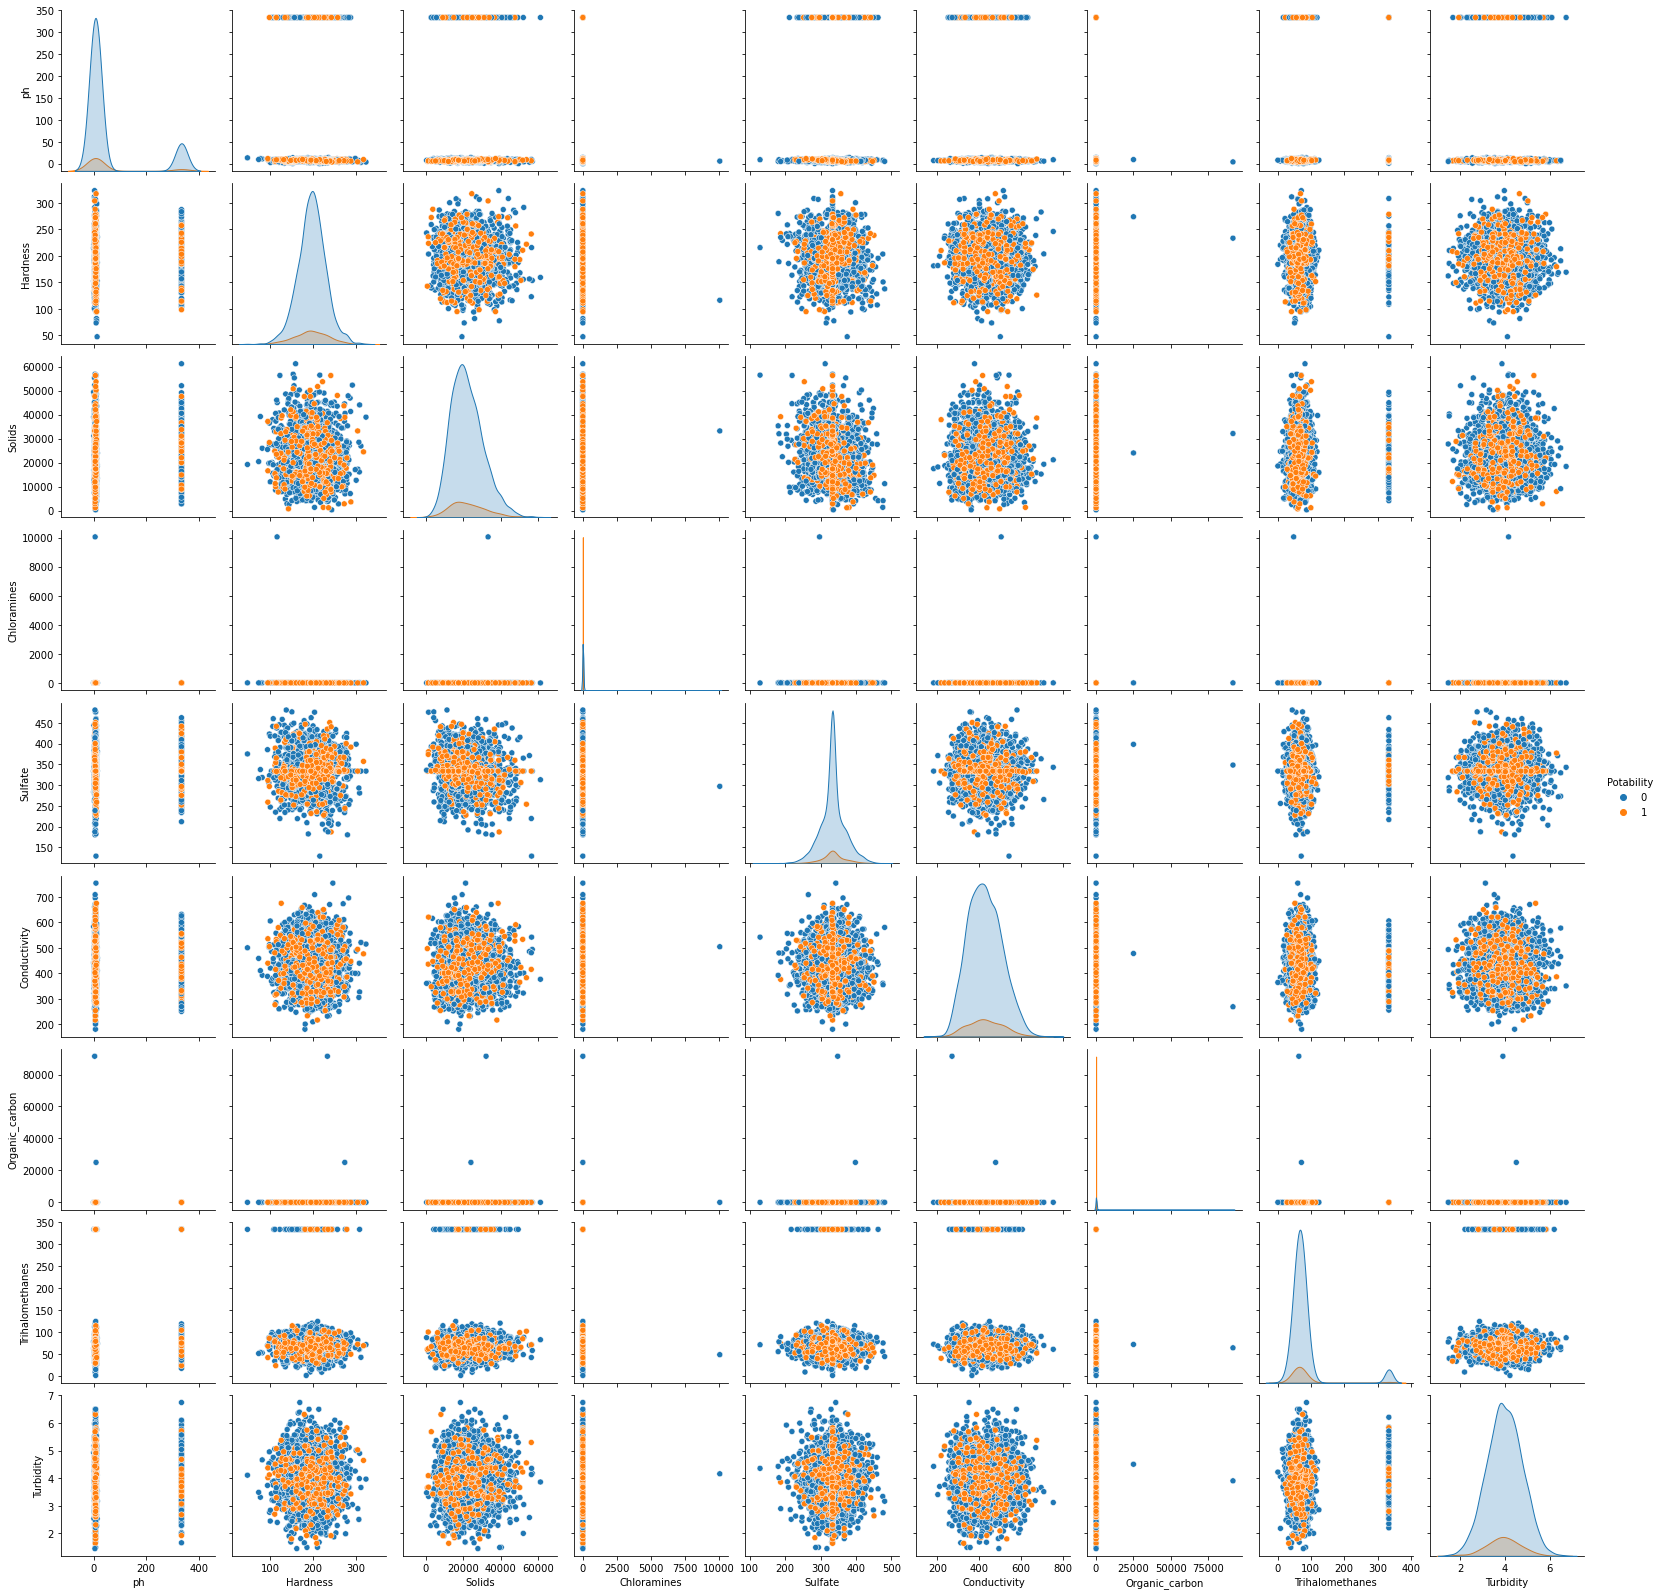

In [39]:
sns.pairplot(df,hue='Potability')

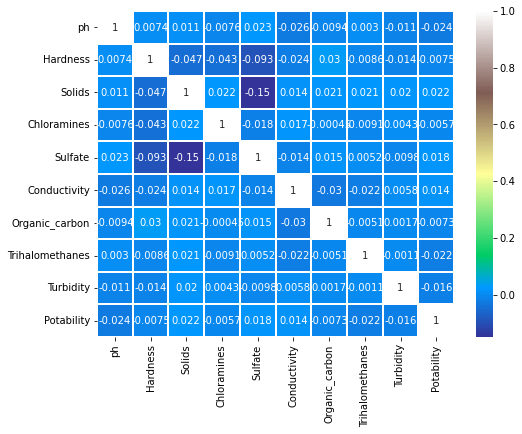

In [40]:
# create a correlation heatmap
sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

<AxesSubplot:>

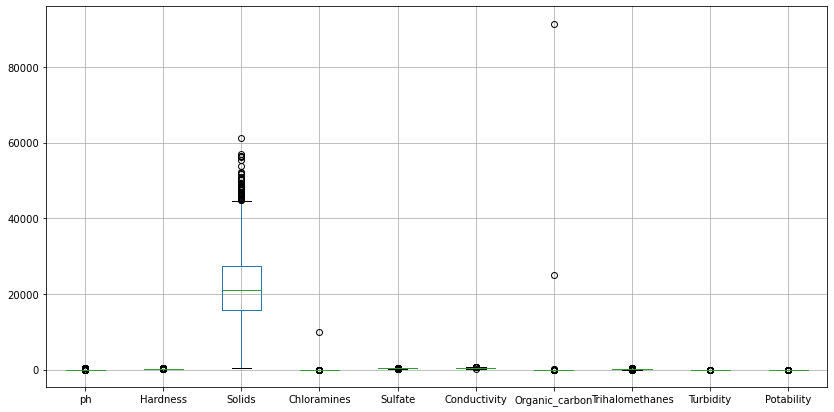

In [41]:
df.boxplot(figsize=(14,7))

In [42]:
df['Solids'].describe()

count     3276.000000
mean     22014.092520
std       8768.570827
min        320.942611
25%      15666.690300
50%      20927.833605
75%      27332.762125
max      61227.196010
Name: Solids, dtype: float64

Partitioning

In [43]:
X = df.drop('Potability',axis=1)

In [44]:
Y= df['Potability']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

In [46]:
Y_train.value_counts()

0    2348
1     272
Name: Potability, dtype: int64

In [47]:
Y_test.value_counts()

0    590
1     66
Name: Potability, dtype: int64

Model Building

In [54]:
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_predict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import shuffle

Random Forest Baseline Model

In [51]:
#Random Forest Classifier model with Train and Test split 
clf_base = RandomForestClassifier()

#Training the model
clf_base.fit(X_train,Y_train)

RandomForestClassifier()

In [52]:
y_pred = clf_base.predict(X_test)

In [56]:
# Random Forest baseline model accuracy
print("RF Base line model accuracy:", metrics.accuracy_score(Y_test, y_pred)*100)

RF Base line model accuracy: 89.63414634146342


In [57]:
# Random Forest baseline classification report
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       590
           1       0.25      0.02      0.03        66

    accuracy                           0.90       656
   macro avg       0.58      0.51      0.49       656
weighted avg       0.83      0.90      0.85       656



Random Forest model feature importance prior to hyper parameter tuning

<AxesSubplot:>

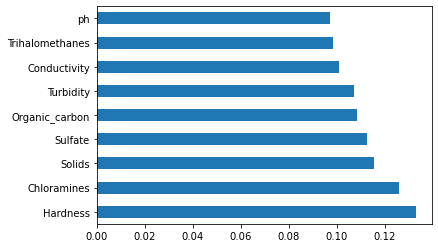

In [58]:
# Feature importance before hyper parameter tunning
feat_importance = clf_base.feature_importances_

feat_importances_pre_hyper = pd.Series(feat_importance, index = X.columns)
feat_importances_pre_hyper.nlargest(20).plot(kind='barh')

Iteration 1: Random Forest model with hyper parameters

In [59]:
# Iteration 1: Perform 10 fold grid search to tune hyperparameter of the random forest model.
cross_val = StratifiedKFold(n_splits=10)
#index_iterator = cross_val.split(X_train, y_train)

clf_random = RandomForestClassifier()

params_1 = { 
    'n_estimators': [10, 50, 100],
    'max_features': ['auto','sqrt','log2'],
    'max_depth' : list(range(1, 8)),
    'criterion' :['entropy', 'gini'] 
}

clf_rf = GridSearchCV(clf_random, params_1, cv = cross_val, verbose=0)

#rf_model = clf_rf.fit(X,y)

clf_rf.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]})

In [60]:
print('Best Parameter:', clf_rf.best_params_)

Best Parameter: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 10}


In [62]:
# Investigate the per fold accuracy, mean accuracy with deviation  for Random Forest Classifier model iteration 1 of hyper parameter tunning 
rfc_hyper_param_1 = RandomForestClassifier(max_depth=7, n_estimators=100, max_features='sqrt', criterion = 'entropy')
cross_val = StratifiedKFold(n_splits=10)

X_s, y_s = shuffle(X, Y)
cv_results_rf_hyp_1 = cross_val_score(rfc_hyper_param_1, X_s, y_s, cv = cross_val, scoring='accuracy')

print("Random Forest Model Hyper Param 1 accuracy from each of 10 folds: ", cv_results_rf_hyp_1)
print("Random Forest Model Hyper Param 1 Mean Accuracy: %.3f%%, Random Forest Model Hyper Param 1 Standard Deviation: (%.3f%%)" % (cv_results_rf_hyp_1.mean()*100.0, cv_results_rf_hyp_1.std()*100.0))


Random Forest Model Hyper Param 1 accuracy from each of 10 folds:  [0.89634146 0.89634146 0.89634146 0.89634146 0.89634146 0.89634146
 0.89908257 0.89908257 0.89602446 0.89602446]
Random Forest Model Hyper Param 1 Mean Accuracy: 89.683%, Random Forest Model Hyper Param 1 Standard Deviation: (0.113%)


In [65]:
#Training the Random Forest Classifier model with Train and Test split in iteration 1 of hyper parameter tunning 
rfc_hyper_param_1.fit(X_train,Y_train)

y_pred_hyp_1 = rfc_hyper_param_1.predict(X_test)

# Model Accuracy
print("Accuracy of Random Forest Classifier model with Train and Test split in iteration 1 of hyper parameter tunning:", metrics.accuracy_score(Y_test, y_pred_hyp_1))

Accuracy of Random Forest Classifier model with Train and Test split in iteration 1 of hyper parameter tunning: 0.899390243902439


In [66]:
print("Classification report of Random Forest Classifier model with Train and Test split in iteration 1 of hyper parameter tunning:", metrics.classification_report(Y_test, y_pred_hyp_1))

Classification report of Random Forest Classifier model with Train and Test split in iteration 1 of hyper parameter tunning:               precision    recall  f1-score   support

           0       0.90      1.00      0.95       590
           1       0.00      0.00      0.00        66

    accuracy                           0.90       656
   macro avg       0.45      0.50      0.47       656
weighted avg       0.81      0.90      0.85       656



SVM Classifier SVM base model

In [71]:
# train the model on train set
model_base_SVM = SVC()
model_base_SVM.fit(X_train, Y_train)
 
# print prediction results
y_pred_base = model_base_SVM.predict(X_test)
print(classification_report(Y_test, y_pred_base))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       590
           1       0.00      0.00      0.00        66

    accuracy                           0.90       656
   macro avg       0.45      0.50      0.47       656
weighted avg       0.81      0.90      0.85       656



In [72]:
test_accuracy_svm_base = accuracy_score(Y_test,y_pred_base)*100

print("SVM accuracy for testing dataset without hyper parameter tuning is : {:.2f}%".format(test_accuracy_svm_base) )

SVM accuracy for testing dataset without hyper parameter tuning is : 89.94%


Decesion Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=10)

In [74]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(Y_test,prediction)*100
accuracy_dt

80.79268292682927

In [75]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, Y_test)))

Accuracy on training set: 0.961
Accuracy on test set: 0.808


Logistic Regression Classifier

LR base model

In [76]:
lr_base_clf = LogisticRegression()

lr_base_clf.fit(X_train, Y_train)

LogisticRegression()

In [77]:
# make predictions for test data
y_pred_lr_base = lr_base_clf.predict(X_test)

# LR base model accuracy
print("LR base model accuracy:", metrics.accuracy_score(Y_test, y_pred_lr_base)*100)

LR base model accuracy: 89.9390243902439
